In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/scripts/trials/QA/DwSampler/AutoEmbedding


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', '..', '..', '..','functions', 'QA'))

In [4]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../../../../../input/ost25.csv', sep=',')
df

,Y,LI,SEX,AOP
0,1,0,1,0
1,1,1,0,0
2,1,0,1,0
3,1,1,1,1
4,0,1,1,1
5,0,1,0,1
6,1,1,1,1
7,1,1,0,0
8,1,1,0,0
9,1,1,0,0


In [8]:
print('25 bit datasets t1:', np.dot(df['Y'], df['LI']))

25 bit datasets t1: 10


In [9]:
t_list = qda.calc_marginals(df)

In [10]:
bqm = qda.make_Hamiltonian(df)

In [11]:
import timeit
time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)

In [12]:
n = 100
num_reads = 100
chain_strength = 11

In [13]:
QDA = qda.QA_DSampler_AEmbedding(df, chain_strength, num_reads, t_list, bqm, n, time_once)

In [14]:
for x in dir(QDA):
    print (x, ':', type(eval("QDA."+x)))

__class__ : <class 'type'>
__delattr__ : <class 'method-wrapper'>
__dict__ : <class 'dict'>
__dir__ : <class 'builtin_function_or_method'>
__doc__ : <class 'NoneType'>
__eq__ : <class 'method-wrapper'>
__format__ : <class 'builtin_function_or_method'>
__ge__ : <class 'method-wrapper'>
__getattribute__ : <class 'method-wrapper'>
__gt__ : <class 'method-wrapper'>
__hash__ : <class 'method-wrapper'>
__init__ : <class 'method'>
__init_subclass__ : <class 'builtin_function_or_method'>
__le__ : <class 'method-wrapper'>
__lt__ : <class 'method-wrapper'>
__module__ : <class 'str'>
__ne__ : <class 'method-wrapper'>
__new__ : <class 'builtin_function_or_method'>
__reduce__ : <class 'builtin_function_or_method'>
__reduce_ex__ : <class 'builtin_function_or_method'>
__repr__ : <class 'method-wrapper'>
__setattr__ : <class 'method-wrapper'>
__sizeof__ : <class 'builtin_function_or_method'>
__str__ : <class 'method-wrapper'>
__subclasshook__ : <class 'builtin_function_or_method'>
__weakref__ : <class

In [15]:
valid_y_info_list, valid_y_num, valid_y_list = QDA.find_valid_y_ntimes()

In [16]:
valid_y_num

62

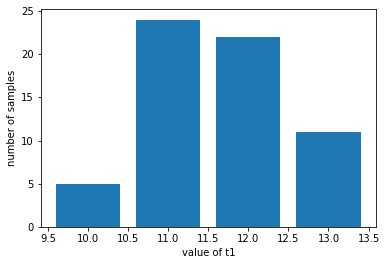

In [17]:
plot_path = '../../../../../output/QA/DwSamplerAutoEmbed_25bit_n100_num100_strength11_t1_hist'
hist_dic = QDA.y_num_t1_hist(valid_y_info_list, plot_path)

In [18]:
hist_dic

{11: 24, 12: 22, 10: 5, 13: 11}

In [19]:
sum(hist_dic.values())

62

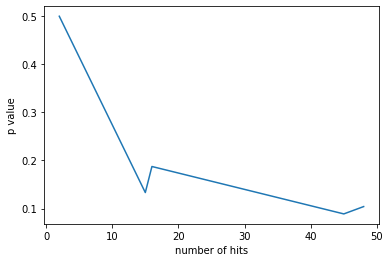

In [23]:
output_path = '../../../../../output/QA/DwSamplerAutoEmbed_25bit_n100_num100_strength11_p_value_transition'
valid_y_num, valid_y_list, p_dic = QDA.p_value_transition(valid_y_info_list, output_path) 

In [21]:
QDA.time_measurement()

0.010451211000007675

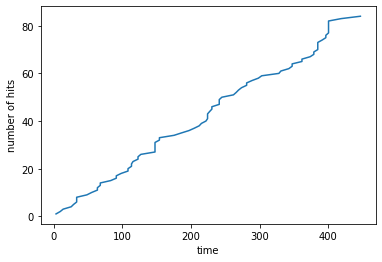

In [22]:
path = '../../../../../output/QA/DSampler_AEmbed_25bit_time_num'
valid_y_list, valid_y_num_list, time_list = QDA.time_num_y(path)